# Emotion Detection

#### Importing Libraries

Tensorflow libraries with their function:
1.ImageDataGenerator: For real-time data augmentation and preprocessing of image data.

2.Dense, Input, Dropout, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D: Layers used to define the architecture of neural networks.

3.Model, Sequential: To define and instantiate models in Keras either as sequential or functional API-based models.

4.Adam: An optimizer for gradient-based optimization algorithms.

5.ModelCheckpoint, ReduceLROnPlateau: Callbacks for saving the model during training based on certain conditions and for reducing learning rate     when a metric has stopped improving.

6.plot_model: To generate a plot of the neural network model architecture.

In [16]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.15.0


##### Exploring Dataset

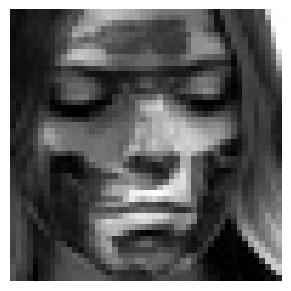

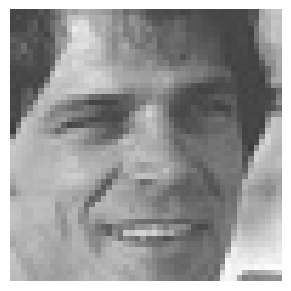

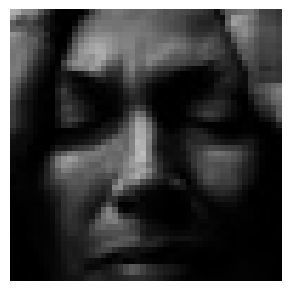

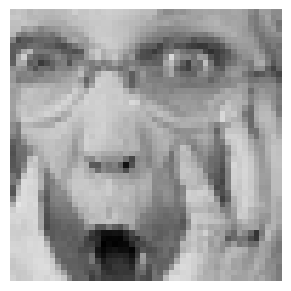

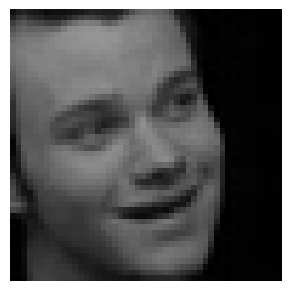

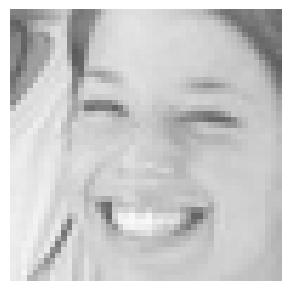

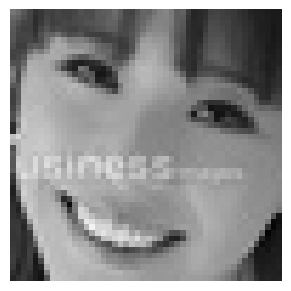

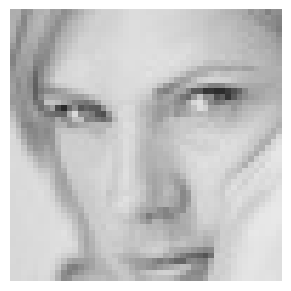

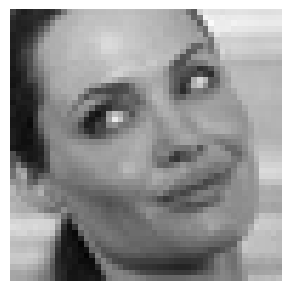

In [18]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)  # randomly chooses the images
    plt.figure(figsize=(12,12)) # size of images
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

#### Preparing data for training

In [5]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Defining the Model**

In [6]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [7]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [8]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))

    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)

    output  = Dense(7, activation="softmax")(dense_1)
    model  =  Model(inputs=[inputs],outputs = [output])
    
    model.compile(loss=['categorical_crossentropy'] , optimizer = 'adam' , metrics =["accuracy"])

    return model

In [9]:
model = model_fer((48,48,1))
model.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0  

**Initializing the Model**

In [10]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
callbacks = [checkpoint]

**Training the Model**

In [12]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/15


448/448 [==============================] - ETA: 0s - loss: 1.6745 - accuracy: 0.3563
Epoch 1: saving model to model_weights.h5
448/448 [==============================] - 499s 1s/step - loss: 1.6745 - accuracy: 0.3563 - val_loss: 1.4438 - val_accuracy: 0.4452
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.3869 - accuracy: 0.4737
Epoch 2: saving model to model_weights.h5
448/448 [==============================] - 1245s 3s/step - loss: 1.3869 - accuracy: 0.4737 - val_loss: 1.5432 - val_accuracy: 0.4470
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.2697 - accuracy: 0.5166
Epoch 3: saving model to model_weights.h5
448/448 [==============================] - 200s 447ms/step - loss: 1.2697 - accuracy: 0.5166 - val_loss: 1.2432 - val_accuracy: 0.5230
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 1.2030 - accuracy: 0.5422
Epoch 4: saving model to model_weights.h5
448/448 [==============================] - 169

**Model Evolution**

In [20]:
model.evaluate(validation_generator)

113/113 [==============================] - 6s 52ms/step - loss: 1.0750 - accuracy: 0.6124


[1.0750486850738525, 0.6124268770217896]

**Ploting Loss**

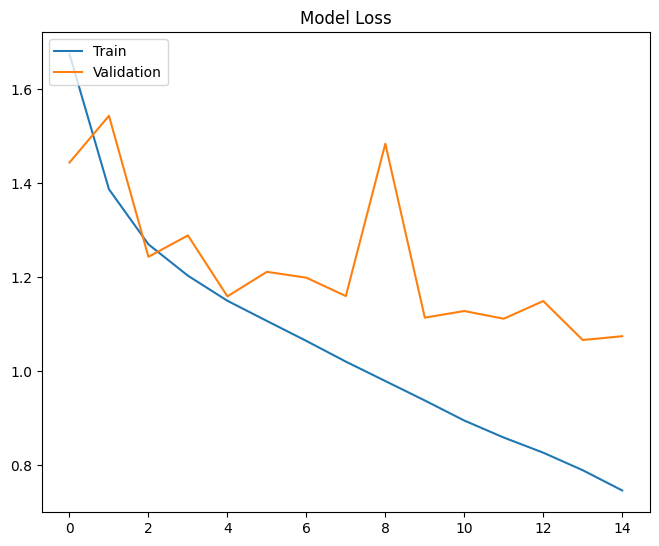

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

**Ploting Accuracy**

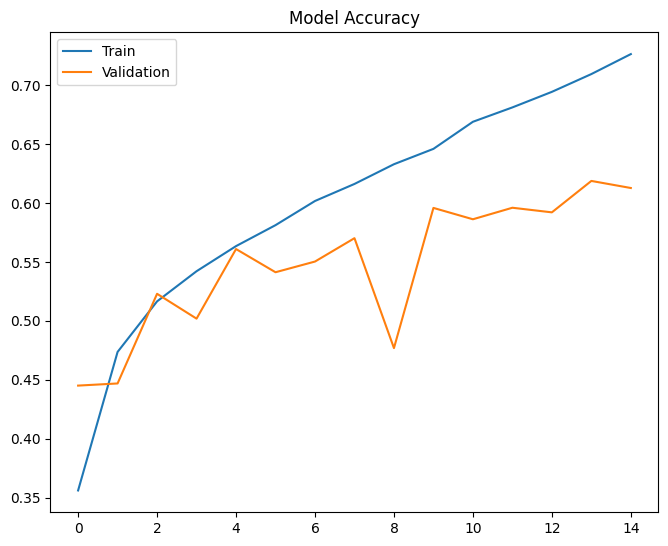

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

**Saving Model**

In [22]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)